In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
data = pd.read_csv("B:\Project\.venv\copper_modeling\Copper_Set.csv")
df = pd.DataFrame(data)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [62]:
# Handling and coverting the df in the columns to the required df formats
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


Null / Missing Values Handling


In [64]:
# Cheking for Null/missing Values
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

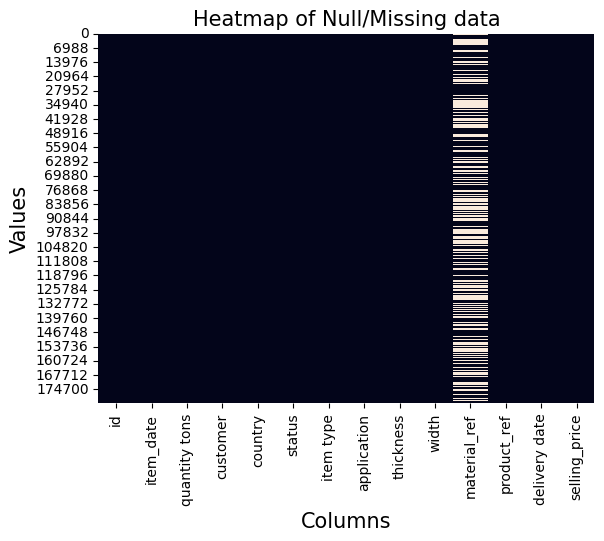

In [65]:
# Visualization of Null/missing values in the form a Heatmap
sns.heatmap(df.isnull(),cbar = False)
plt.title('Heatmap of Null/Missing data', fontsize = 15)
plt.xlabel('Columns', fontsize = 15)
plt.ylabel('Values', fontsize = 15)
plt.show()

In [66]:
# material_ref column has large set of null values, so filling the data with the most frequent category i.e. mode
df['material_ref'].fillna(df['material_ref'].mode()[0], inplace=True)

# Rest of the columns have very less amount of null values hence droping that data, as it will not hamper our results
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [68]:
df.shape

(181631, 14)

Checking and Handling for Skewness in the Data

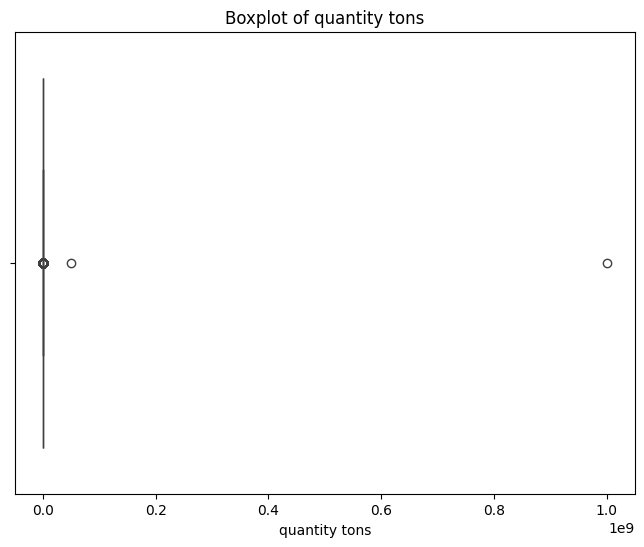

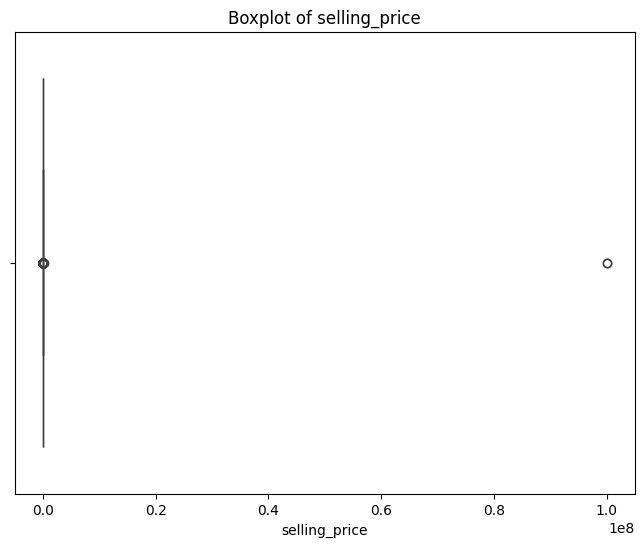

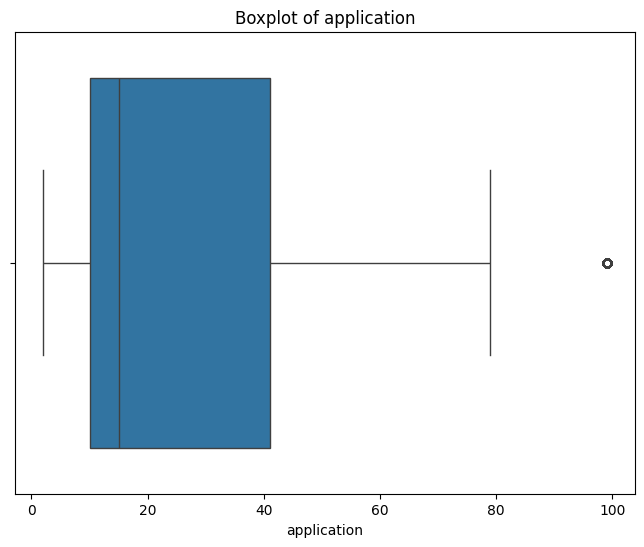

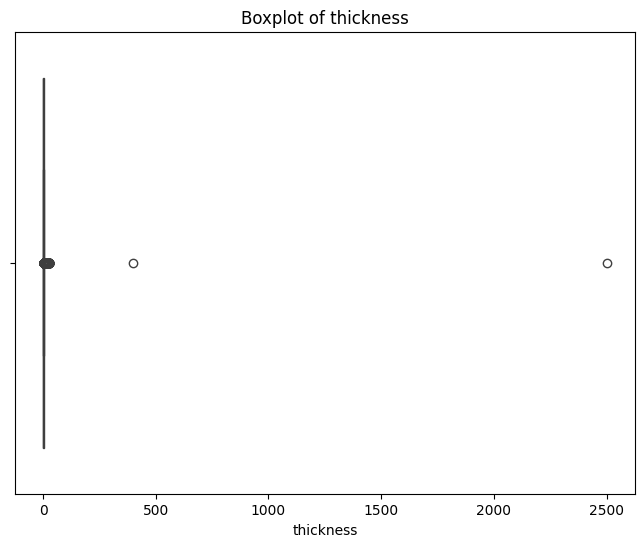

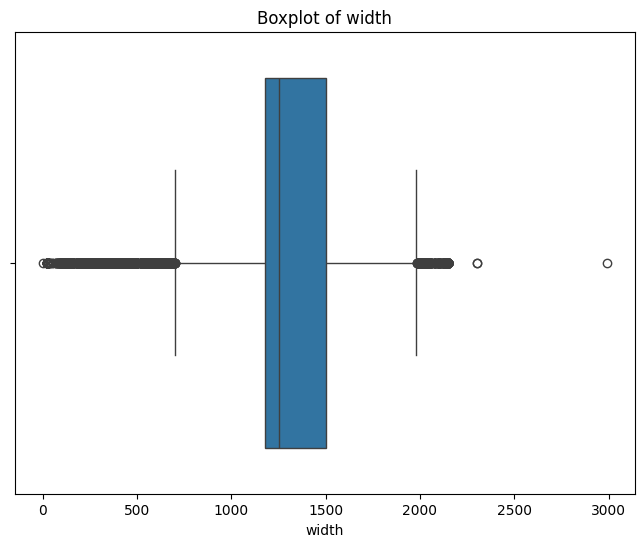

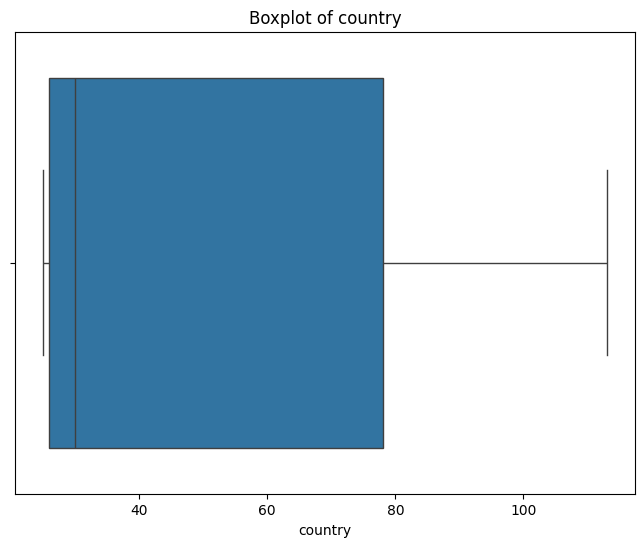

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['quantity tons', 'selling_price', 'application', 'thickness', 'width', 'country']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [70]:
df1 = df

In [71]:
# To handle skewness we are going to use the Log Transformation
# Log transformation is often used to reduce right skewness (positive skewness) in data.
# It is particularly effective when dealing with data where the values are strictly positive. 

flag1 = df1['quantity tons'] <= 0
print(flag1.sum())

flag2 = df1['selling_price'] <= 0
print(flag2.sum())

flag3 = df1['application'] <= 0
print(flag3.sum())

flag4 = df1['thickness'] <= 0
print(flag4.sum())

flag5 = df1['width'] <= 0
print(flag5.sum())

flag6 = df1['country'] <= 0
print(flag6.sum())

4
7
0
0
0
0


In [72]:
# Converting the values less that 0 to NAN values so that we can use Log Transformation 
# Only doing it for the below colums because out of six columns only two columns had values less that 0 as displayed above

df1.loc[flag1, 'quantity tons'] = np.nan
df1.loc[flag2, 'selling_price'] = np.nan

In [73]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [74]:
# Now dropping those NaN values so that we can use Log Transformation to handle skewness

df1.dropna(inplace=True)
df1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

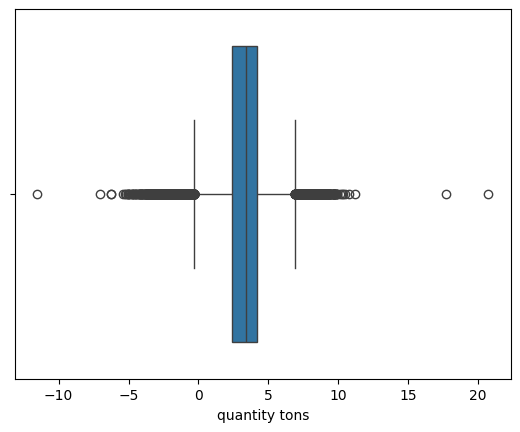

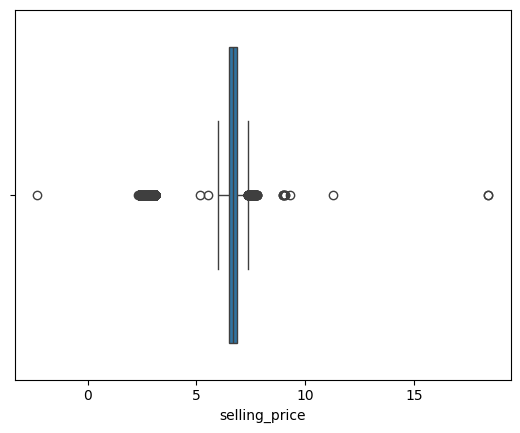

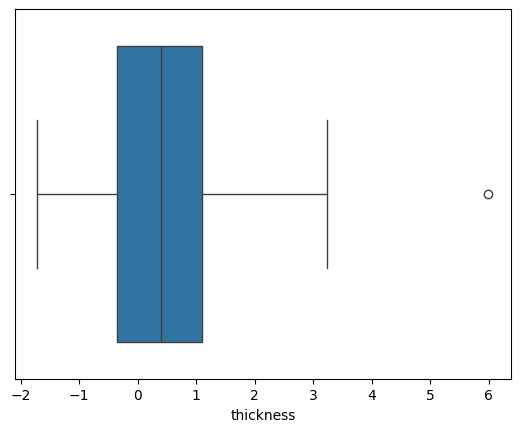

In [75]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns

df1['quantity tons'] = np.log(df1['quantity tons'])
sns.boxplot(x='quantity tons', data=df1)
plt.show()

df1['selling_price'] = np.log(df1['selling_price'])
sns.boxplot(x='selling_price', data=df1)
plt.show()

df1['thickness'] = np.log(df1['thickness'])
sns.boxplot(x='thickness', data=df1)
plt.show()

Visualization among different columns using Correlation Matrix

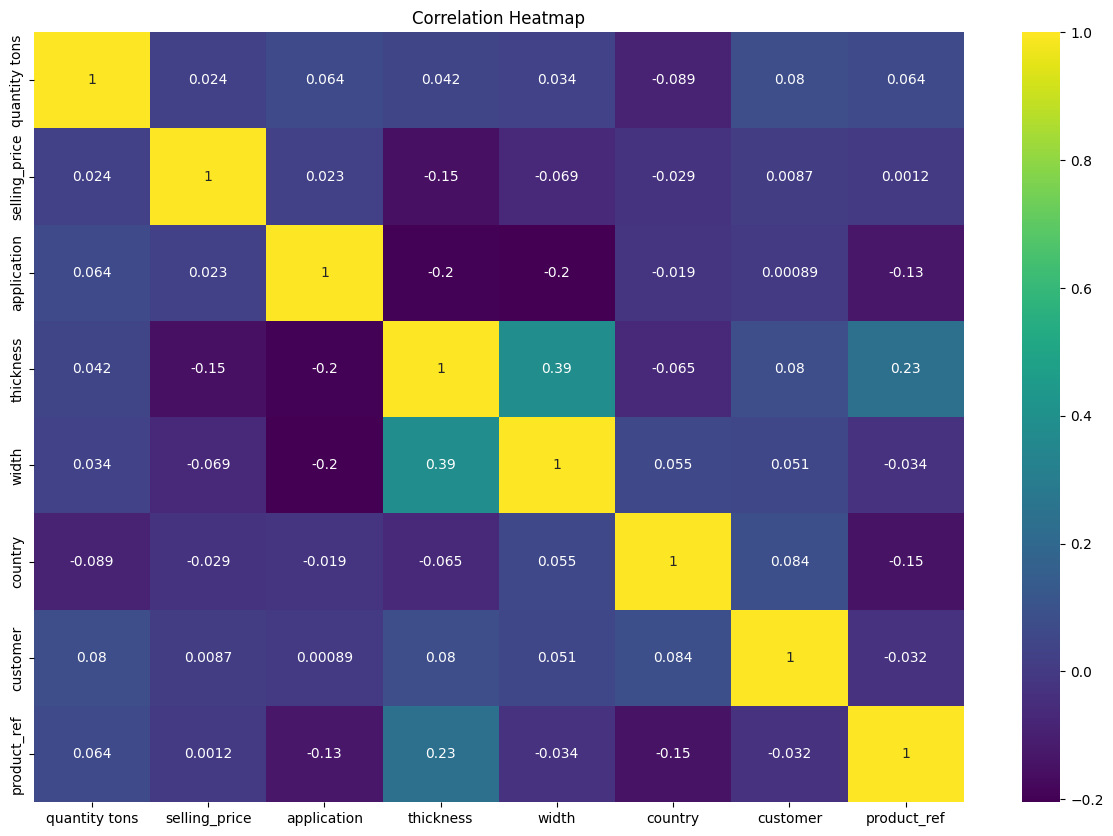

In [76]:
# columns for which you want to calculate correlations
selected_columns = ['quantity tons', 'selling_price', 'application', 'thickness', 'width', 'country', 'customer', 'product_ref']

# Calculating the correlation matrix
corr = df1[selected_columns].corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='viridis', ax=ax)
plt.title("Correlation Heatmap")
plt.show()

Decision Tree Regressor

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X=df1[['quantity tons','status','item type','application','thickness','width','country','customer','product_ref']]
y=df1['selling_price']


# One-Hot Encoding, encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)


# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.415067,-0.879562,0.228140,0.782459,-0.692250,-0.757716,1.667905,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
1,2.250430,0.866543,-0.753398,-0.325891,-0.815179,-0.294035,1.664983,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
2,1.774535,0.134305,-1.550848,-1.311941,-0.610298,-0.781034,-0.659749,-0.012194,-0.058052,-0.179334,...,18.590402,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
3,1.327558,1.880410,0.377854,0.083052,-0.528346,1.164090,1.664983,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
4,2.266023,-0.879562,0.970645,2.693408,-0.692250,-0.208299,-0.659732,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181615,0.884989,0.866543,-0.558093,-0.211234,-0.815179,-0.314758,-0.431867,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
181616,0.856538,0.866543,-0.558093,-0.287672,-0.815179,-0.314758,-0.431867,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
181617,1.346696,0.866543,-0.569310,0.782459,-0.815179,-0.314758,-0.431867,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346
181618,-1.348468,0.866543,-0.881243,-0.173015,-0.815179,-0.314758,-0.431867,-0.012194,-0.058052,-0.179334,...,-0.053791,-0.132208,-0.483657,-0.347473,-0.00742,-0.017085,-0.155278,-0.153239,0.752159,-0.002346


In [79]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 4}
Mean squared error: 0.04440260853776103
R-squared: 0.8621768983989166


In [81]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

Decision Tree Classifier

In [82]:
df1 = df1[df1['status'].isin(['Won', 'Lost'])]
len(df1)

150427

In [83]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

Y = df1['status']
X= df1[['item type','application','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)

# independent features after encoding
X = np.concatenate((X[['application','width','country','customer','product_ref']].values, X_ohe), axis=1)


# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [84]:
test_dataframe2 = pd.DataFrame(X)
test_dataframe2

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.861366,0.759513,-0.710194,-0.725078,1.667403,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
1,0.896005,-0.330024,-0.832701,-0.283558,1.664479,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
2,0.159043,-1.299337,-0.628522,-0.747282,-0.661135,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,-1.253854,17.24721
3,1.916413,0.071978,-0.546850,1.104877,1.664479,-0.013399,-0.055564,-0.186035,1.366631,-0.002578,-1.253854,-0.05798
4,-0.861366,2.638026,-0.710194,-0.201920,-0.661118,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
...,...,...,...,...,...,...,...,...,...,...,...,...
150422,0.896005,-0.217313,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
150423,0.896005,-0.292454,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
150424,0.896005,0.759513,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798
150425,0.896005,-0.179743,-0.832701,-0.303290,-0.433166,-0.013399,-0.055564,-0.186035,-0.731727,-0.002578,0.797541,-0.05798


In [85]:
test_dataframe3 = pd.DataFrame(y)
test_dataframe3

,0
0,1
1,1
2,1
3,1
4,1
...,...
150422,1
150423,1
150424,1
150425,1


In [86]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


# evalution metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8801768264308981


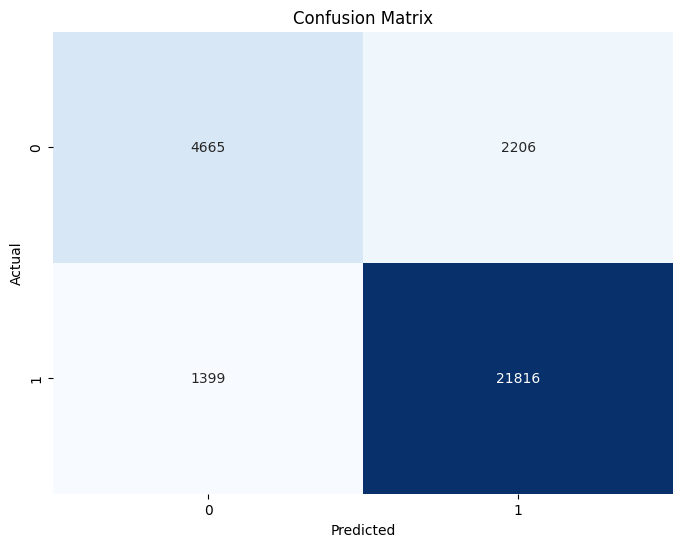

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [89]:
from sklearn.metrics import classification_report

classification_r = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_r)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      6871
           1       0.91      0.94      0.92     23215

    accuracy                           0.88     30086
   macro avg       0.84      0.81      0.82     30086
weighted avg       0.88      0.88      0.88     30086



In [90]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)